# 🔹 UFC Model Experiments

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 1. Import Libraries and Setup Environment

In [1]:
# Import necessary libraries
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', 200) 

# Get the current working directory
current_dir = os.getcwd()

# Navigate to the project root
project_root = os.path.abspath(os.path.join(current_dir, '..'))

# Import from /src
sys.path.append(os.path.join(project_root, 'src'))
from metrics import *
from model_factory import model_factory
from model import UFCModel
from data import UFCData
from config import *
from io_model import load_data, load_model
from helpers import *

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 2. Load Data

In [2]:
# Load the UFCData object
try:
    ufc_data = load_data()
    ufc_data.summary()
except Exception as e:
    print_header(f"Error loading training data: {e}", color='bright_red')

/home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
📦 UFCData object loaded from: /home/mlioi/ufc-predictor/data/processed/ufc_data.pkl
📊 UFC Dataset Summary
----------------------------------------
🧪 Total samples      : 6001
🧪 Train/Test split  : 4800 / 1201
🧪 Total features     : 18

🔢 Numerical features : 16
🔠 Categorical features: 2
    - Binary          : 1
    - Multiclass      : 1

🏷 Label distribution (raw):
   - Class 0: 3484 (58.1%)
   - Class 1: 2517 (41.9%)

✅ No missing values detected

📈 Feature summary statistics (train set):
                           mean      std       min       max
LoseStreakDif             0.059    1.012    -6.000     6.000
WinStreakDif             -0.162    1.921   -18.000    10.000
KODif                    -0.536    2.181   -21.000    14.000
SubDif                   -0.334    1.877   -15.000    10.000
HeightDif                -0.066    6.843  -187.960    30.480
AgeDif                    0.196    5.213   -17.000    17.000
SigStrDif              

<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 3. Load Models

In [3]:
model_list = [UFCModel(model=load_model(name, verbose=True)) for name in pretty_model_name]

📦 Model Logistic Regression loaded from: /home/mlioi/ufc-predictor/models/lr_best.pkl
📦 Model Random Forest loaded from: /home/mlioi/ufc-predictor/models/rf_best.pkl
📦 Model Support Vector Machine loaded from: /home/mlioi/ufc-predictor/models/svm_best.pkl
📦 Model K-Nearest Neighbors loaded from: /home/mlioi/ufc-predictor/models/knn_best.pkl
📦 Model AdaBoost loaded from: /home/mlioi/ufc-predictor/models/ab_best.pkl
📦 Model Naive Bayes loaded from: /home/mlioi/ufc-predictor/models/nb_best.pkl
📦 Model Extra Trees loaded from: /home/mlioi/ufc-predictor/models/et_best.pkl
📦 Model Gradient Boosting loaded from: /home/mlioi/ufc-predictor/models/gb_best.pkl
📦 Model Quadratic Discriminant Analysis loaded from: /home/mlioi/ufc-predictor/models/qda_best.pkl
📦 Model Neural Network loaded from: /home/mlioi/ufc-predictor/models/nn_best.pkl
📦 Model XGBoost loaded from: /home/mlioi/ufc-predictor/models/xgb_best.pkl


<div style="text-align: center;">
  🔹 <img src="../img/ufc_logo.png" width="50" /> 🔹
</div>

## 4. Evaluate Models

In [4]:
for model in model_list:
    model.metrics = evaluate_metrics(model, ufc_data)
    model.cm = evaluate_cm(model, ufc_data)

## 5. Check Models

### Metrics Comparison

In [5]:
model_metrics = compare_metrics(model_list)

INFO:metrics:Starting comparison of models...
INFO:metrics:Evaluating: Logistic Regression
INFO:metrics:Evaluating: Random Forest
INFO:metrics:Evaluating: Support Vector Machine
INFO:metrics:Evaluating: K-Nearest Neighbors
INFO:metrics:Evaluating: AdaBoost
INFO:metrics:Evaluating: Naive Bayes
INFO:metrics:Evaluating: Extra Trees
INFO:metrics:Evaluating: Gradient Boosting
INFO:metrics:Evaluating: Quadratic Discriminant Analysis
INFO:metrics:Evaluating: Neural Network
INFO:metrics:Evaluating: XGBoost


╔════════════════════════╗
║  Comparison Completed  ║
╚════════════════════════╝


In [6]:
display(model_metrics)

,Accuracy,Precision,Recall,F1 Score,ROC AUC,Brier Score
Model,,,,,,
Logistic Regression,0.6595,0.6112,0.5179,0.5607,0.7132,0.2146
Random Forest,0.6536,0.6302,0.4226,0.5059,0.7073,0.2167
Support Vector Machine,0.6578,0.6064,0.5258,0.5632,0.7119,0.2129
K-Nearest Neighbors,0.6095,0.5467,0.4067,0.4664,0.6381,0.2359
AdaBoost,0.6553,0.6264,0.4425,0.5186,0.7102,0.2126
Naive Bayes,0.6278,0.5569,0.5536,0.5552,0.6753,0.2317
Extra Trees,0.6320,0.5871,0.4147,0.4860,0.6657,0.2249
Gradient Boosting,0.6561,0.6176,0.4742,0.5365,0.7133,0.2107
Quadratic Discriminant Analysis,0.6486,0.5928,0.5198,0.5539,0.6883,0.2216


### Best Model per Metric

In [7]:
best_models_df = best_model_per_metric(model_metrics)
display(best_models_df)

INFO:metrics:Best model for Accuracy: Neural Network (0.6603)
INFO:metrics:Best model for Precision: XGBoost (0.6456)
INFO:metrics:Best model for Recall: Naive Bayes (0.5536)
INFO:metrics:Best model for F1 Score: Support Vector Machine (0.5632)
INFO:metrics:Best model for ROC AUC: Gradient Boosting (0.7133)
INFO:metrics:Best model for Brier Score: K-Nearest Neighbors (0.2359)


,Metric,Best Model,Value
0,Accuracy,Neural Network,0.6603
1,Precision,XGBoost,0.6456
2,Recall,Naive Bayes,0.5536
3,F1 Score,Support Vector Machine,0.5632
4,ROC AUC,Gradient Boosting,0.7133
5,Brier Score,K-Nearest Neighbors,0.2359


### Feature Importance

✅ Plot saved to: /home/mlioi/ufc-predictor/img/Noise-based-feature-selection-part5


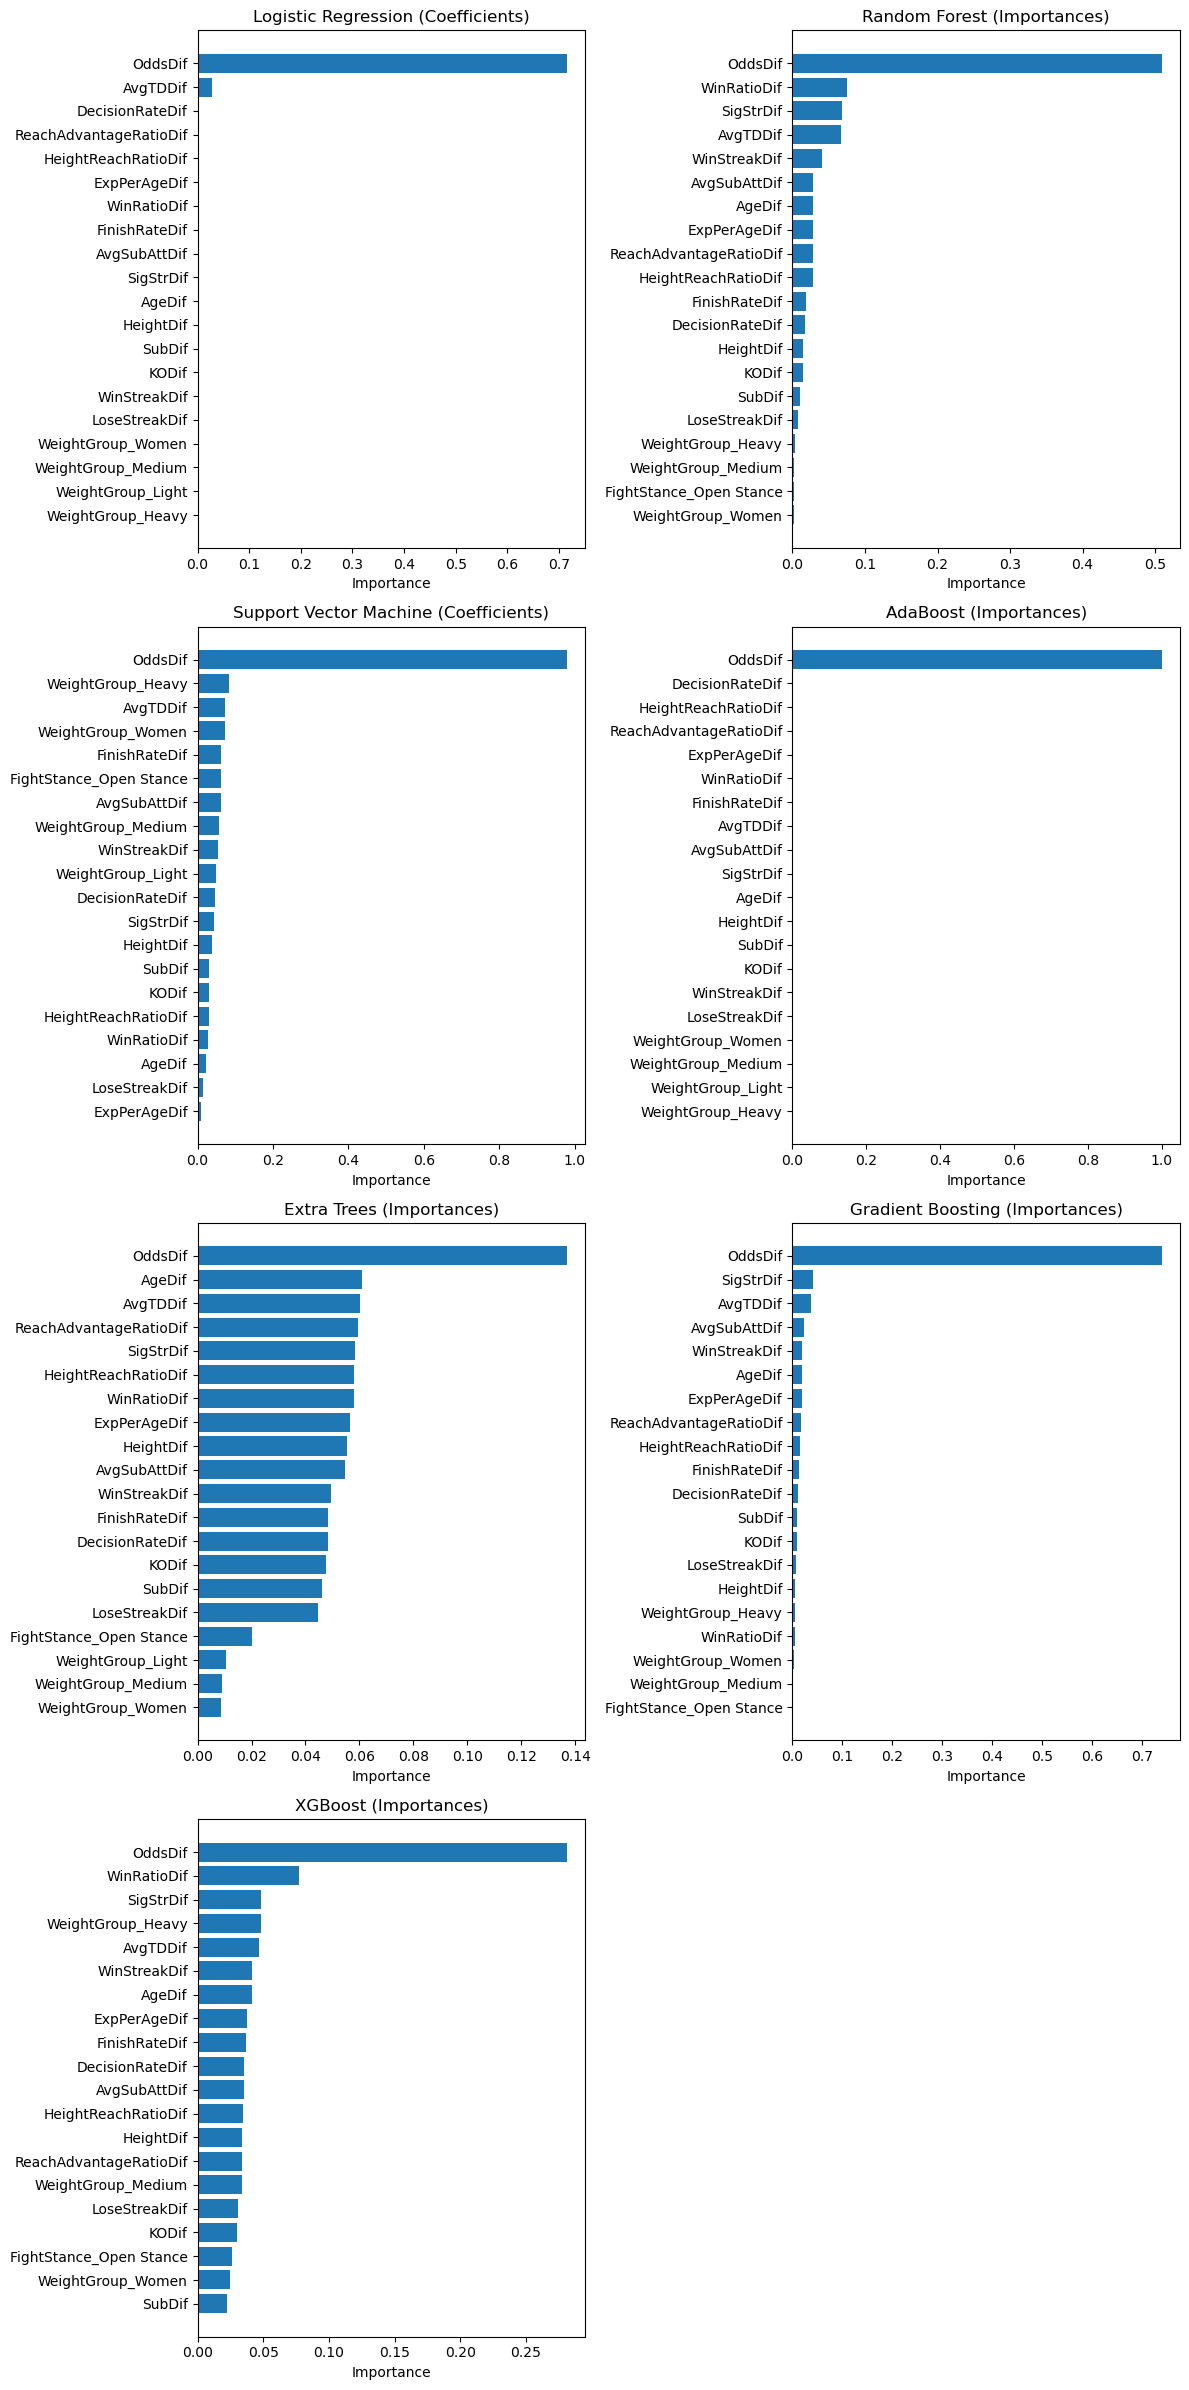

In [8]:
feature_names = ufc_data.get_processed_train()[0].columns.tolist()
UFCModel.plot_feature_importances_grid(model_list, save_file=True, feature_names= feature_names, filename= 'Noise-based-feature-selection-part5')

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should

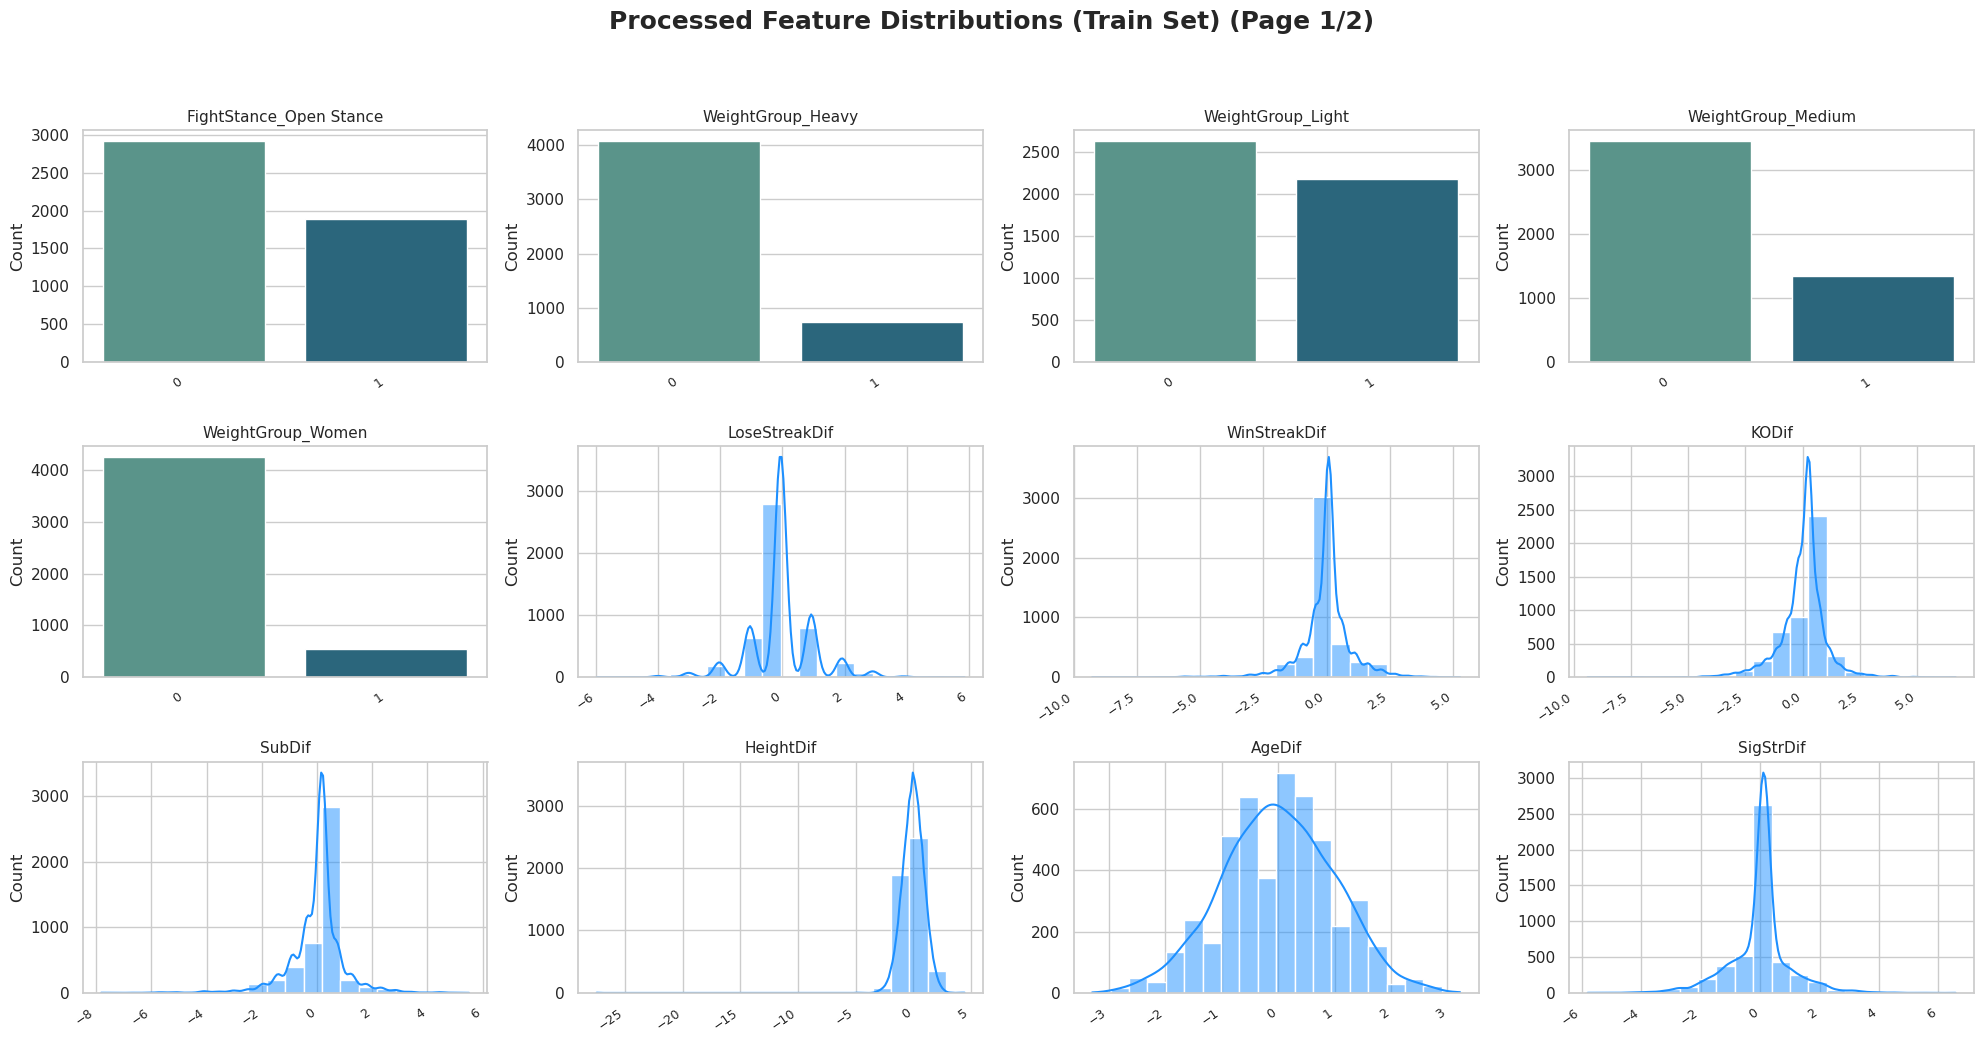

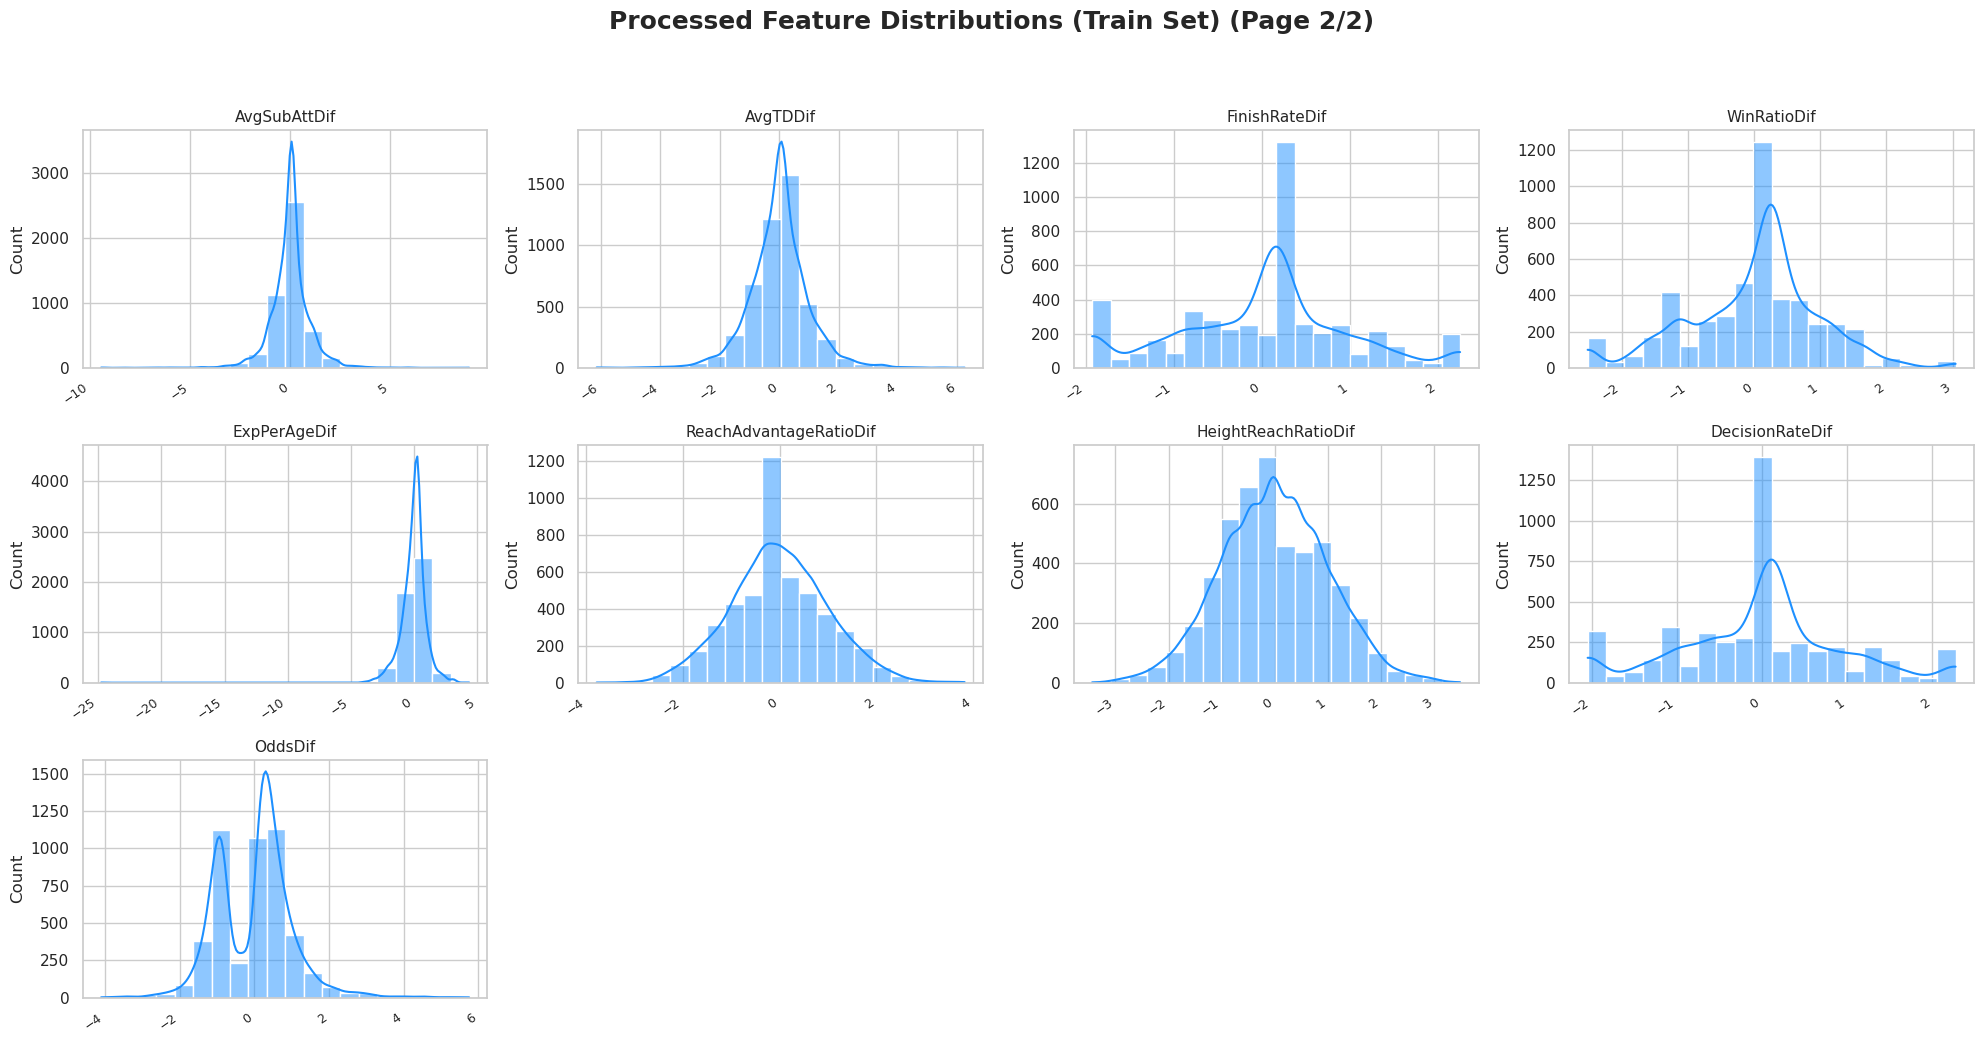

In [9]:
ufc_data.plot_feature_distributions(processed=True)